# __Вопрос 1__
Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as plt
import seaborn as sns

from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

%matplotlib inline

In [4]:
df = pd.read_csv("water.txt", delimiter='\t')
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


/home/tater/ML_coursera/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


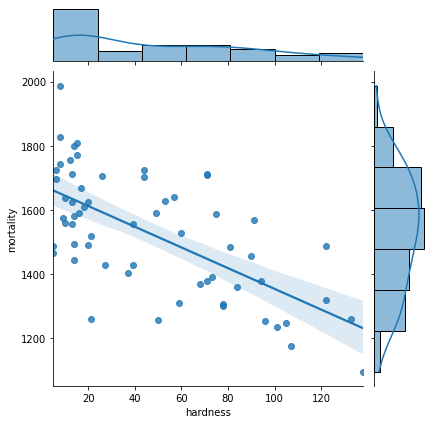

In [40]:
sns.jointplot('hardness', 'mortality', df, kind="reg");

In [19]:
ans = df.corr()
print(round(ans.mortality[1],5))

-0.65485


In [20]:
ans = df.corr(method='spearman')
print(round(ans.mortality[1],5))

-0.63166


In [26]:
norths = df[df["location"] == "North"]
souths = df[df["location"] == "South"]

In [27]:
norths

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15
8,North,Bradford,1637,10
11,North,Burnley,1755,12
15,North,Darlington,1491,20
16,North,Derby,1555,39
17,North,Doncaster,1428,39


In [28]:
souths

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73
12,South,Cardiff,1519,21
13,South,Coventry,1307,78
14,South,Croydon,1254,96
18,South,East Ham,1318,122
19,South,Exeter,1260,21


In [31]:
norths.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [46]:
sns.jointplot?

/home/tater/ML_coursera/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/tater/ML_coursera/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


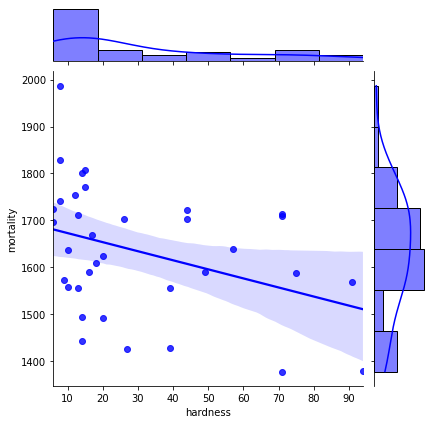

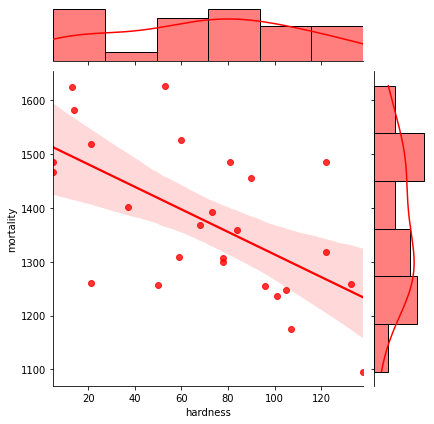

In [47]:
sns.jointplot('hardness', 'mortality', norths, kind="reg", color='blue');
sns.jointplot('hardness', 'mortality', souths, kind="reg", color='red');

In [32]:
souths.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [71]:
print(round(max(norths.corr().mortality[1], souths.corr().mortality[1]),5))

-0.3686


# __Вопрос 4__
Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.  

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [44]:
bars_sex = np.array([[203., 239.], [718., 515.]])
bars_sex

array([[203., 239.],
       [718., 515.]])

In [48]:
# Используем матрицу сопряженности, вводим функцию
def matthewsr(a, b, c, d):
    return (a*d - b*c) / np.sqrt((a + b)*(a + c)*(b + d)*(c + d))

In [50]:
# Return a copy of the array collapsed into one dimension.
bars_sex.flatten()

array([203., 239., 718., 515.])

In [51]:
matthews_coeff = matthewsr(*bars_sex.flatten())
print('Matthews correlation: %.4f' % matthews_coeff)

Matthews correlation: -0.1090


In [72]:
stats.chi2_contingency?

In [58]:
bars_sex.shape

(2, 2)

In [54]:
print('Matthews significance p-value: %f' % stats.chi2_contingency(bars_sex)[1])

Matthews significance p-value: 0.000011


В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [59]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = sample1[0] / np.sum(sample1)
    p2 = sample2[0] / np.sum(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    
    return (left_boundary, right_boundary)

In [60]:
print('95%% confidence interval for a difference of men and women: [%.4f, %.4f]' %
      proportions_diff_confint_ind(bars_sex[:,1], bars_sex[:,0]))

95% confidence interval for a difference of men and women: [0.0539, 0.1392]


Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили 5.5\times10^{-8}5.5×10 
−8
 , нужно ввести 8).

In [61]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = np.sum(sample1)
    n2 = np.sum(sample2)
    
    p1 = sample1[0] / n1
    p2 = sample2[0] / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [62]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [63]:
print('p-value: %f' % proportions_diff_z_test(proportions_diff_z_stat_ind(bars_sex[:,1], bars_sex[:,0])))

p-value: 0.000008


Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

Не доволен Более или менее Доволен

Не очень счастлив 197 111 33

Достаточно счастлив 382 685 331

Очень счастлив 110 342 333

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [64]:
happiness = np.array( [[197., 111., 33. ],
                       [382., 685., 331.],
                       [110., 342., 333.]] )

In [65]:
stats.chi2_contingency(happiness)
print('Chi2 stat value: %.4f' % stats.chi2_contingency(happiness)[0])

Chi2 stat value: 293.6831


На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [66]:
print('Chi2 stat p-value: %.62f' % stats.chi2_contingency(happiness)[1])

Chi2 stat p-value: 0.00000000000000000000000000000000000000000000000000000000000002


Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

In [67]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [68]:
print('V Cramer stat value: %.4f' % cramers_stat(happiness))

V Cramer stat value: 0.2412


In [14]:
chi2_contingency?

In [16]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2,chisquare

In [30]:
table = [[20,15], [11,12], [7,9]]
chi2, prob, df, expected = scipy.stats.chi2_contingency(table)
chi2, prob, df, expected

(0.9544070774762996,
 0.6205162173513055,
 2,
 array([[17.97297297, 17.02702703],
        [11.81081081, 11.18918919],
        [ 8.21621622,  7.78378378]]))

In [18]:
chisquare([10,10,10,5,10,15], f_exp=[10,10,10,10,10,10])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

In [20]:
chisquare([795, 705], f_exp=[750,750])

Power_divergenceResult(statistic=5.4, pvalue=0.02013675155034633)

In [13]:
chi2, prob, df, expected

(2.666666666666667,
 0.7512117103661213,
 5,
 array([[10. , 10. , 10. ,  7.5, 10. , 12.5],
        [10. , 10. , 10. ,  7.5, 10. , 12.5]]))

In [34]:
mosaic?

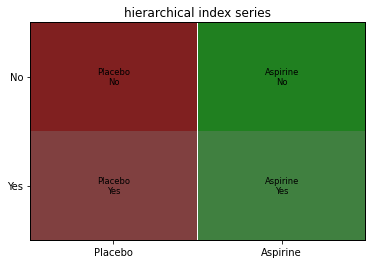

In [37]:
#Вот так тоже можно в Python:
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([50,50,50,50], index=index)
mosaic(data, title='hierarchical index series')
plt.show()